# Mini Projeto - Machine Learning

## 3ª Etapa: Classificação completo de digitos - estratégia 1 contra todos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from linear_models import *
from utils import *

In [2]:
new_train_df = pd.read_csv('./dados/train_reduced.csv')
new_test_df = pd.read_csv('./dados/test_reduced.csv')

In [3]:
new_train_df = pd.read_csv('./dados/train_reduced.csv')
new_test_df = pd.read_csv('./dados/test_reduced.csv')

X_train = new_train_df[['intensidade', 'simetria']]
X_train = X_train.to_numpy()
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

X_test = new_test_df[['intensidade', 'simetria']]
X_test = X_test.to_numpy()
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

y_train = new_train_df['label']
y_train = y_train.to_numpy()

y_test = new_test_df['label']
y_test = y_test.to_numpy()

In [4]:
digitos = [1, 0, 4, 5]

Nmin = np.ceil(X_train.shape[0] * 0.5).astype(int)
Nmax = np.ceil(X_train.shape[0] * 1.0).astype(int)

lr = LinearRegression()
# lr = PocketPLA(4000, Nmin=Nmin, Nmax=Nmax)
# lr = LogisticRegression(tmax=400000, batch_size=256)

digitos = [1, 0, 4, 5]
modelo = Um_contra_todos(lr, digitos)
modelo.execute(X_train, y_train)
all_w = modelo.get_all_w()
ypred = modelo.predict_digit(X_test)


print(accuracy_score(y_test, ypred))
from collections import Counter
counter_pred = Counter(ypred)
counter_ytest = Counter(y_test)
print(counter_pred)
print(counter_ytest)
multiclass_confusion_matrix(y_test, ypred)

0.9614349775784753
Counter({4: 330, 1: 292, 5: 286, 0: 207})
Counter({4: 314, 1: 292, 5: 291, 0: 218})


array([[207,   0,   0,  11],
       [  0, 292,   0,   0],
       [  0,   0, 306,   8],
       [  0,   0,  24, 267]])

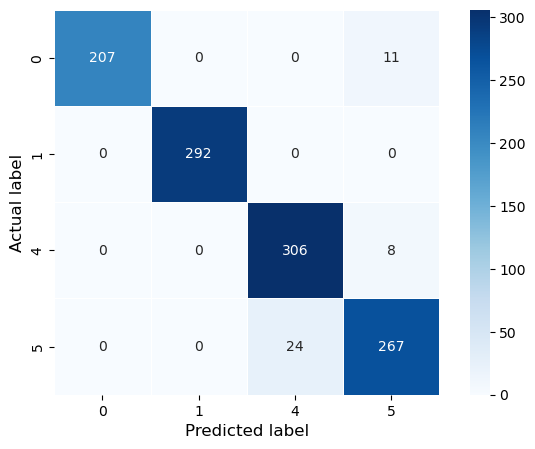

In [5]:
confusion_matrix_plot(y_test, ypred)

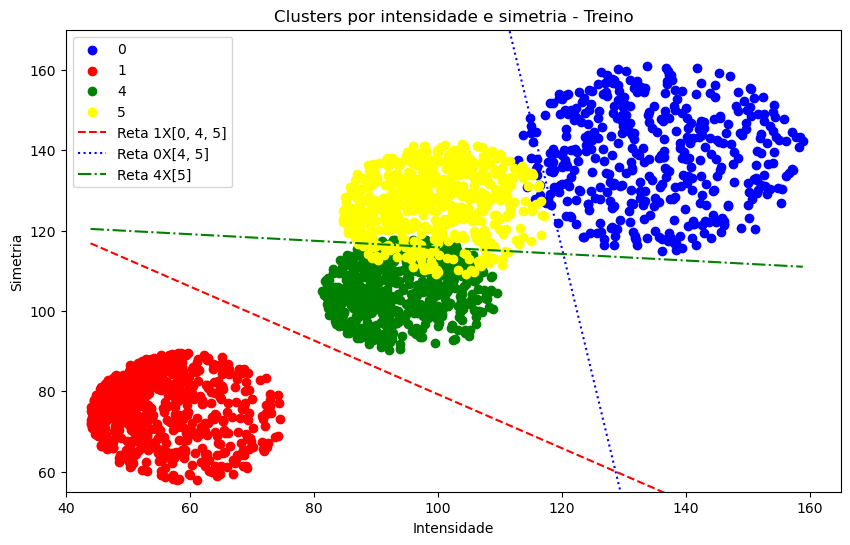

In [6]:
plot_classification_digits(new_train_df, digitos, ['red', 'blue', 'green', 'yellow'], 'Clusters por intensidade e simetria - Treino', all_w[:4])
